C:\Users\danny\AppData\Local\Temp\ipykernel_7584\1873340900.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  incarcerations = pd.read_csv('../state/AL/al_incarcerations_scraped.csv').drop(columns='collection_id')


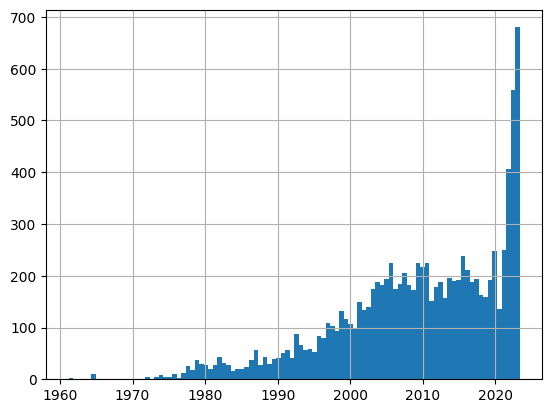

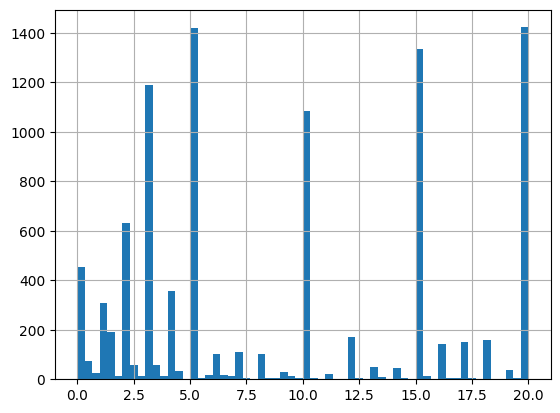

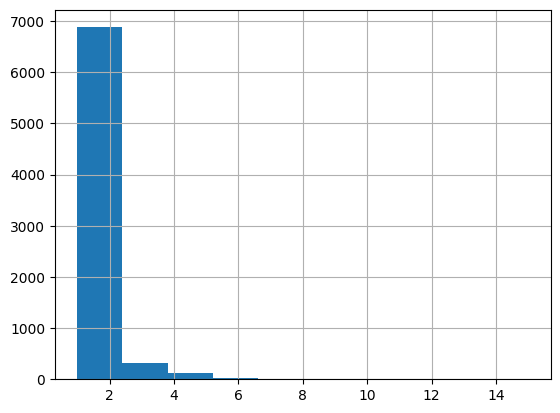

In [5]:
%run ./2023-05-08-AL-gun-mm-processing.ipynb

In [7]:
disag.head()

,Unnamed: 0_x,SUF,Admit_Date,Total_Term,Time_Served,Jail_Credit,Good_Time_Received,Good_Time_Revoked,Min_Release_Date,Parole_Consideration_Date,Parole_Status,most_recent,AIS,incarceration_id,run_id,total_term,time_served,good_time_received,good_time_revoked,admit_date,min_release_date,parole_consideration_date,sex_offender,Unnamed: 0_y,Case_Number,Sentenced,Offense,Term,Type,Commit_County,is_firearm,term,sentenced,count,involves_gun_possession,involves_discharging_a_gun,is_a_felony_dangerous_to_human_life,min_sentence
incarceration_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
101907-B,1464,B,05/07/1975,1Y 0M 0D,0Y 11M 28D,72,0Y 0M 0D,0Y 0M 0D,NaN,NaN,NO HEARING,False,00101907,101907-B,2023-05-05 17:43:14.033905,1.0,0.993326,0.000000,0.000000,1975-05-07,2262-04-11 23:47:16.854775807,2262-04-11 23:47:16.854775807,False,64629,CC1975-032863,04/18/1975,BURGLARY II (OLD CODE/PRIOR JAN 80),10Y 0M 0D,Concurrent,MOBILE,False,10.0,1975-04-18,255,False,False,True,0
102626-0,7072,0,05/03/1971,3Y 0M 0D,1Y 0M 19D,0,1Y 1M 6D,0Y 0M 0D,03/26/1973,05/01/1980,NO HEARING,False,00102626,102626-0,2023-05-05 15:53:15.991829,3.0,1.052019,1.099760,0.000000,1971-05-03,1973-03-26 00:00:00.000000000,1980-05-01 00:00:00.000000000,False,20697,*CR1971-010101,05/03/1971,BURGLARY II (OLD CODE/PRIOR JAN 80),3Y 0M 0D,Consecutive,HOUSTON,False,3.0,1971-05-03,255,False,False,True,0
102626-A,16205,A,06/20/1977,9Y 0M 0D,2Y 0M 25D,35,3Y 10M 24D,0Y 0M 0D,06/20/1982,NaN,NO HEARING,False,00102626,102626-A,2023-05-05 15:53:15.991829,9.0,2.068446,3.899042,0.000000,1977-06-20,1982-06-20 00:00:00.000000000,2262-04-11 23:47:16.854775807,False,41161,*CC1977-000146,06/20/1977,ASSAULT/INTENT MURDER,9Y 0M 0D,Consecutive,HOUSTON,False,9.0,1977-06-20,45,False,False,True,0
102855-A,23016,A,08/20/1979,10Y 0M 0D,3Y 9M 25D,341,6Y 4M 0D,0Y 2M 0D,06/04/1982,NaN,NO HEARING,False,00102855,102855-A,2023-05-05 15:53:15.991829,10.0,3.818446,6.333333,0.166667,1979-08-20,1982-06-04 00:00:00.000000000,2262-04-11 23:47:16.854775807,False,71671,CC1978-000569,07/16/1979,BURGLARY II (OLD CODE/PRIOR JAN 80),10Y 0M 0D,Consecutive,MONTGOMERY,False,10.0,1979-07-16,255,False,False,True,0
103769-A,16206,A,05/19/1977,9Y 0M 0D,2Y 10M 4D,219,6Y 1M 22D,0Y 0M 0D,08/17/1979,11/01/1978,NO HEARING,False,00103769,103769-A,2023-05-05 15:53:15.991829,9.0,2.844285,6.143566,0.000000,1977-05-19,1979-08-17 00:00:00.000000000,1978-11-01 00:00:00.000000000,False,41039,CC1977-000012,05/19/1977,ARSON I (OLD CODE/ < JAN 1980),9Y 0M 0D,Consecutive,LEE,False,9.0,1977-05-19,7,False,False,True,0


Transitions Data

In [77]:
# Using total_term as assumption of sentence length
# Start at Y2K
# Relevant cols in disag: total_term, is_firearm, involves_gun_possession, involves_discharging_a_gun, is_a_felony_dangerous_to_human_life, admit_date (to see if too old)
relevant_cols = disag[["total_term", "min_sentence", "Admit_Date"]]
relevant_cols["Admit_Date"] = relevant_cols["Admit_Date"].apply(lambda x: int(x[-4:]))
relevant_cols.head()

C:\Users\danny\AppData\Local\Temp\ipykernel_7584\3186261393.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_cols["Admit_Date"] = relevant_cols["Admit_Date"].apply(lambda x: int(x[-4:]))


,total_term,min_sentence,Admit_Date
incarceration_id,,,
101907-B,1.0,0,1975
102626-0,3.0,0,1971
102626-A,9.0,0,1977
102855-A,10.0,0,1979
103769-A,9.0,0,1977


In [78]:
# only considering after 2000 -- sentence distribution might be different before then
relevant_years = relevant_cols[relevant_cols["Admit_Date"] >= 2000]
relevant_years.head()

,total_term,min_sentence,Admit_Date
incarceration_id,,,
108708-S,15.0,0,2009
110812-R,20.0,0,2011
112117-B,17.0,0,2010
113903-S,20.0,0,2009
115013-S,16.0,0,2009


In [79]:
# make df for transitions from prison to release
pr_transitions = pd.DataFrame(columns=["compartment", "outflow_to", "compartment_duration", "total_population", "min_sentence"])
pr_transitions

,compartment,outflow_to,compartment_duration,total_population,min_sentence


In [80]:
pr_transitions = relevant_years.copy()
pr_transitions = pr_transitions.drop("Admit_Date", axis=1)
pr_transitions.head()

,total_term,min_sentence
incarceration_id,,
108708-S,15.0,0
110812-R,20.0,0
112117-B,17.0,0
113903-S,20.0,0
115013-S,16.0,0


In [81]:
# create rows for people going from prison to release
pr_transitions["compartment"] = "prison"
pr_transitions["outflow_to"] = "release"
pr_transitions = pr_transitions.rename(columns={"total_term": "compartment_duration"})
pr_transitions["total_population"] = 1.0
pr_transitions["compartment_duration"] = pr_transitions["compartment_duration"] * 12
pr_transitions.head()

,compartment_duration,min_sentence,compartment,outflow_to,total_population
incarceration_id,,,,,
108708-S,180.0,0,prison,release,1.0
110812-R,240.0,0,prison,release,1.0
112117-B,204.0,0,prison,release,1.0
113903-S,240.0,0,prison,release,1.0
115013-S,192.0,0,prison,release,1.0


In [84]:
pr_transitions.min_sentence.value_counts()

0     5852
10     130
Name: min_sentence, dtype: int64

In [96]:
# Adding release-to-release rows
transitions = pr_transitions.copy()
transitions.loc[len(transitions.index)] = [1.0, "0", "release", "release", 1.0]
transitions.loc[len(transitions.index)] = [1.0, "10", "release", "release", 1.0]

In [97]:
transitions = transitions.reset_index(drop=True)
transitions.head()

,compartment_duration,min_sentence,compartment,outflow_to,total_population
0,180.0,0,prison,release,1.0
1,240.0,0,prison,release,1.0
2,204.0,0,prison,release,1.0
3,240.0,0,prison,release,1.0
4,192.0,0,prison,release,1.0


In [98]:
# reorder columns
transitions = transitions[["compartment", "outflow_to", "min_sentence", "compartment_duration", "total_population"]]
transitions.head()

,compartment,outflow_to,min_sentence,compartment_duration,total_population
0,prison,release,0,180.0,1.0
1,prison,release,0,240.0,1.0
2,prison,release,0,204.0,1.0
3,prison,release,0,240.0,1.0
4,prison,release,0,192.0,1.0


In [99]:
transitions

,compartment,outflow_to,min_sentence,compartment_duration,total_population
0,prison,release,0,180.0,1.0
1,prison,release,0,240.0,1.0
2,prison,release,0,204.0,1.0
3,prison,release,0,240.0,1.0
4,prison,release,0,192.0,1.0
...,...,...,...,...,...
5979,prison,release,0,0.0,1.0
5980,prison,release,0,0.0,1.0
5981,prison,release,0,0.0,1.0
5982,release,release,0,1.0,1.0


In [100]:
transitions["min_sentence"].value_counts()

0     5853
10     131
Name: min_sentence, dtype: int64

<AxesSubplot: >

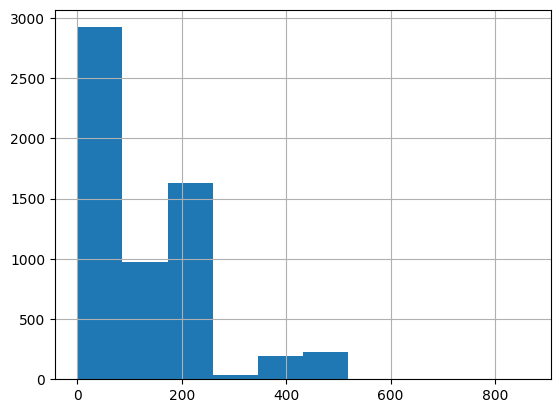

In [104]:
transitions["compartment_duration"].hist()

Estimate for average number of extra people per year -- not for full model

In [119]:
# Filter only people impacted, and reweight each
# An x-year sentence is counted roughly x times as much as a 1 year sentence over a time period
# -- divide weight (1) by compartment duration
transitions_impacted = transitions[(transitions["min_sentence"] == "10") & (transitions["compartment"] == "prison")]
transitions_impacted = transitions_impacted.rename({"total_population": "pop_weight"},axis=1)
transitions_impacted["pop_weight"] = 1 / transitions_impacted["compartment_duration"]

In [120]:
transitions_impacted.head()

,compartment,outflow_to,min_sentence,compartment_duration,total_population,pop_weight
29,prison,release,10,96.0,1.0,0.010417
30,prison,release,10,24.0,1.0,0.041667
151,prison,release,10,240.0,1.0,0.004167
195,prison,release,10,9.0,1.0,0.111111
302,prison,release,10,360.0,1.0,0.002778


In [129]:
# filter 0-length sentences
transitions_impacted = transitions_impacted[transitions_impacted["compartment_duration"] != 0]

In [153]:
transitions_impacted["compartment_duration"].sort_values()

3852      3.0
2453      6.0
195       9.0
1917     10.0
3870     12.0
        ...  
2147    480.0
1849    480.0
1604    480.0
831     480.0
1531    480.0
Name: compartment_duration, Length: 130, dtype: float64

In [136]:
# confirm no null values
transitions_impacted["compartment_duration"].isnull().sum()

0

(array([2.27495974, 0.30135582, 0.21018519, 0.05622244, 0.05953159,
        0.        , 0.        , 0.0109375 , 0.0073299 , 0.01260965]),
 array([  3. ,  50.7,  98.4, 146.1, 193.8, 241.5, 289.2, 336.9, 384.6,
        432.3, 480. ]),
 <BarContainer object of 10 artists>)

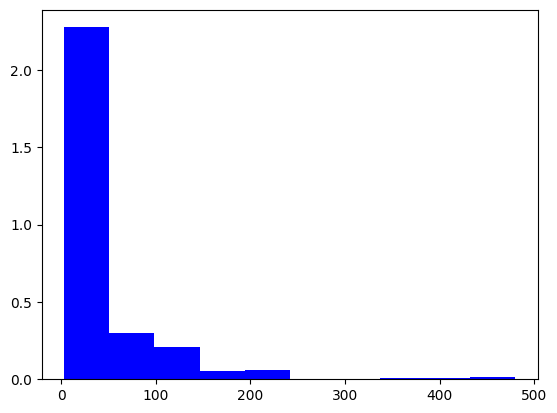

In [150]:
# plot reweighted sentence lengths
f, ax = plt.pyplot.subplots(1)
ax.hist(transitions_impacted.compartment_duration, color='b',weights=transitions_impacted.pop_weight)

<AxesSubplot: >

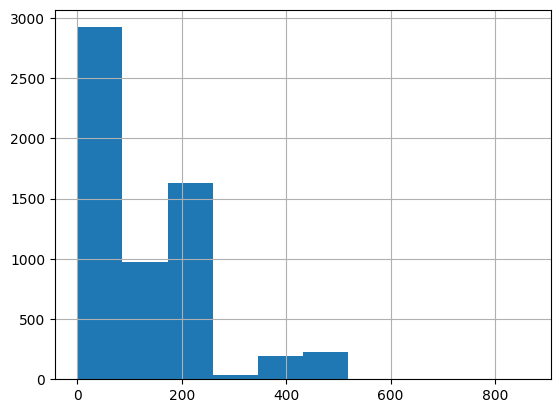

In [126]:
# plot original sentence lengths
transitions["compartment_duration"].hist()

In [154]:
# average sentence. weight * duration is 1 for each row, so numerator is just df length
len(transitions_impacted) / transitions_impacted["pop_weight"].sum()

44.321226470414864

In [156]:
# new df with each sentence brought up to 120 months if below
transitions_after_policy = transitions_impacted.copy()
transitions_after_policy.loc[transitions_after_policy["compartment_duration"] < 120, 'compartment_duration'] = 120

In [157]:
transitions_after_policy.head()

,compartment,outflow_to,min_sentence,compartment_duration,total_population,pop_weight
29,prison,release,10,120.0,1.0,0.010417
30,prison,release,10,120.0,1.0,0.041667
151,prison,release,10,240.0,1.0,0.004167
195,prison,release,10,120.0,1.0,0.111111
302,prison,release,10,360.0,1.0,0.002778


(array([2.78650075, 0.05101411, 0.01473992, 0.05      , 0.        ,
        0.        , 0.00833333, 0.00516827, 0.0047658 , 0.01260965]),
 array([120., 156., 192., 228., 264., 300., 336., 372., 408., 444., 480.]),
 <BarContainer object of 10 artists>)

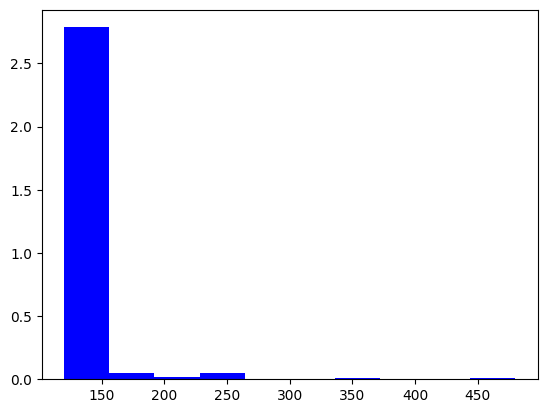

In [158]:
# plot new reweighted sentence lengths
f, ax = plt.pyplot.subplots(1)
ax.hist(transitions_after_policy.compartment_duration, color='b',weights=transitions_after_policy.pop_weight)

In [163]:
# sentence_length_total = transitions_after_policy.apply(lambda x: x["pop_weight"] * x["compartment_durations"], axis=0).sum()
# sentence_length_total / transitions_impacted["pop_weight"].sum()

KeyError: 'pop_weight'

In [164]:
# new avg sentence length
sentence_length_total = (transitions_after_policy.pop_weight * transitions_after_policy.compartment_duration).sum()
sentence_length_total / transitions_impacted["pop_weight"].sum()

126.95647914940469

In [165]:
# proportion of people affected in last year: 0.00627 (other data)
# admissions: 7,101 people admitted in 2022 affected (other data)
# avg sentence length difference 126.95647914940469 - 44.321226470414864 = 82.63525267898981 (from data)

82.63525267898981

In [168]:
outflow_proportion_affected= 0.00627
admissions_count = 7101
avg_dif = 82.63525267898981 / 12

outflow_proportion_affected * admissions_count * avg_dif

306.5993055454073